In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform, seed
import numpy as np
import pandas as pd
import csv
import time
from igraph import *
from functions_EX4 import *

In [2]:
with open('Highschool_network_edge.csv') as csvfile:
    reader = csv.reader(csvfile)
    edges = [(int(row[0][1:]), int(row[1][1:])) for row in reader]

NodeID = []
Gender = []
Hall = []
Threshold = []

with open('Highschool_network_att.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        NodeID.append(int(row[0][1:]))
        Gender.append(row[1])
        Hall.append(row[2])
        Threshold.append(row[3])

# g.vs["Gender"] = Gender
# g.vs["Hall"] = Hall
# g.vs["Threshold"] = Threshold

In [3]:
g = Graph(edges, directed=False)
g.delete_vertices(0)
# Number of components
g.vs["NodeID"] = NodeID
print("Number of components: ", g.vcount())


Number of components:  122


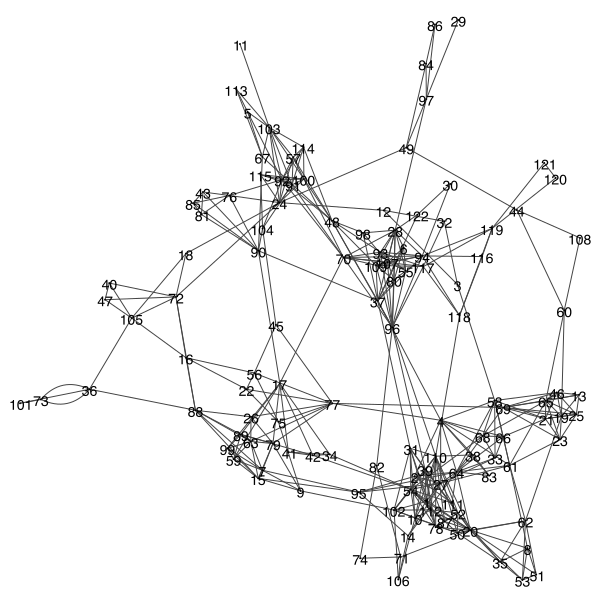

In [5]:
plot(g, bbox = (600,600), margin = 20, layout = g.layout("auto"), vertex_size = 1, vertex_color = "white", vertex_label = g.vs["NodeID"])


In [15]:
greedy_immunized(g, 3, 0.15, mc=600)

([95, 36, 69],
 [74.63333333333334, 50.44166666666667, 39.18666666666667],
 [68.86206698417664, 117.58539700508118, 150.61926889419556])

In [17]:
greedy(g, 3, 0.15, mc=200) # works to slow

([53, 91, 72],
 [[111.265, 29.265], [116.065, 110.285], [115.505, 114.04]],
 [83.30296015739441, 246.99532890319824, 400.85232615470886])

In [13]:
# creating the list of infected nodes per day
No_immunity = IC_immunized(g, [106], [], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Degree = IC_immunized(g, [106], [53, 19, 109], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Betweenness = IC_immunized(g, [106], [36, 3, 95], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy = IC_immunized(g, [106], [53, 91, 72], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy2 = IC_immunized(g, [106], [95, 36, 69], p = 0.15, mc = 100, timestamps = 28 , Monte_Carlo=False)

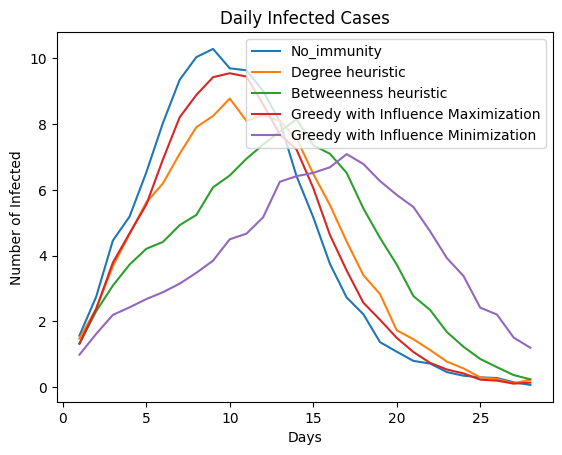

In [14]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[2]) + 1))

# Plotting the three lists
plt.plot(days, No_immunity[2], label='No_immunity')
plt.plot(days, Degree[2], label='Degree heuristic')
plt.plot(days, Betweenness[2], label='Betweenness heuristic')
plt.plot(days, Greedy[2], label='Greedy with Influence Maximization')
plt.plot(days, Greedy2[2], label='Greedy with Influence Minimization')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Daily Infected Cases')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Question 19

In [5]:
# Original dictionary with values
original_dict = {0:15, 1:5, 2:5, 3:1, 4:2, 5:2, 6:1, 7:1, 8:1, 9:0, 10:4}

# Calculate total sum of original values
total_sum = sum(original_dict.values())

# Desired total sum
desired_sum = 122

# Scale factor
scale_factor = desired_sum / total_sum

# Create a new dictionary to store the scaled values
scaled_dict = {}

# Scale up each value proportionally and round to nearest integer
for key, value in original_dict.items():
    scaled_value = round(value * scale_factor)
    scaled_dict[key] = scaled_value

# Check if the total sum of scaled values is less than the desired sum
# If so, add the difference to the highest key (">=10")
total_scaled_sum = sum(scaled_dict.values())
if total_scaled_sum < desired_sum:
    diff = desired_sum - total_scaled_sum
    scaled_dict[10] += diff

Threshold_list = []
for key, value in scaled_dict.items():
    Threshold_list.extend([key] * value)

# Shuffle the list to randomize the distribution
np.random.shuffle(Threshold_list)

In [77]:
greedy_Th(g, 7, Threshold_list, mc=10)

([76, 63, 48, 2, 36, 70, 16],
 [270.0, 438.0, 577.0, 717.0, 807.0, 891.0, 947.0],
 [11.155080080032349,
  21.344395875930786,
  30.890131950378418,
  39.93473720550537,
  48.54200792312622,
  56.90271711349487,
  64.88402700424194])

In [5]:
degree_centrality = g.degree()
sorted_nodes = sorted(range(len(degree_centrality)), key=degree_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Degree Centrality: ", top_7_nodes)

Top 7 Nodes based on Degree Centrality:  [53, 19, 109, 63, 95, 27, 36]


In [6]:
betweenness_centrality = g.betweenness()
sorted_nodes = sorted(range(len(degree_centrality)), key=betweenness_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Betweenness Centrality: ", top_7_nodes)

Top 7 Nodes based on Betweenness Centrality:  [36, 3, 95, 23, 69, 76, 16]


In [6]:

Degree = threshold_model(g, [53, 19, 109, 63, 95, 27, 36], Threshold_list,28,  mc=100, Monte_Carlo = True)
Betweenness = threshold_model(g, [36, 3, 95, 23, 69, 76, 16], Threshold_list, 28, mc=100, Monte_Carlo = True)
Greedy = threshold_model(g, [76, 63, 48, 2, 36, 70, 16], Threshold_list, 28, mc=100, Monte_Carlo = True)
# convert those lists to a lists where each element is the sum of the previous element and the current element

3 2
3 1
1 0
4 2
5 1
1 0
1 0
3 1
4 1
1 0
4 0
2 0
4 0
2 0
1 0
5 2
3 0
1 0
3 0
3 1
6 0
1 0
4 3
6 1
9 1
1 0
2 0
3 0
1 0
2 0
2 0
4 2
1 0
1 0
2 0
4 1
3 0
2 0
4 0
2 0
5 1
11 8
1 0
3 2
1 0
7 4
7 2
1 0
1 0
3 1
4 0
2 0
3 0
1 0
4 1
2 0
5 4
4 2
4 0
3 0
5 0
2 0
5 2
2 0
5 0
1 0
4 2
4 3
7 1
6 5
1 0
3 1
3 2
3 1
1 0
4 2
5 1
1 0
1 0
3 1
4 1
1 0
4 0
2 0
4 0
2 0
1 0
5 2
3 0
1 0
3 0
3 1
6 0
1 0
4 3
6 1
9 1
1 0
2 0
3 0
1 0
2 0
2 0
4 2
1 0
1 0
2 0
4 1
3 0
2 0
4 0
2 0
5 1
11 8
1 0
3 2
1 0
7 4
7 2
1 0
1 0
3 1
4 0
2 0
3 0
1 0
4 1
2 0
5 4
4 2
4 0
3 0
5 0
2 0
5 2
2 0
5 0
1 0
4 2
4 3
7 1
6 5
1 0
3 1
3 2
3 1
1 0
4 2
5 1
1 0
1 0
3 1
4 1
1 0
4 0
2 0
4 0
2 0
1 0
5 2
3 0
1 0
3 0
3 1
6 0
1 0
4 3
6 1
9 1
1 0
2 0
3 0
1 0
2 0
2 0
4 2
1 0
1 0
2 0
4 1
3 0
2 0
4 0
2 0
5 1
11 8
1 0
3 2
1 0
7 4
7 2
1 0
1 0
3 1
4 0
2 0
3 0
1 0
4 1
2 0
5 4
4 2
4 0
3 0
5 0
2 0
5 2
2 0
5 0
1 0
4 2
4 3
7 1
6 5
1 0
3 1
3 2
3 1
1 0
4 2
5 1
1 0
1 0
3 1
4 1
1 0
4 0
2 0
4 0
2 0
1 0
5 2
3 0
1 0
3 0
3 1
6 0
1 0
4 3
6 1
9 1
1 0
2 0
3 0
1 0
2 0
2 0
4 2
1 0
1

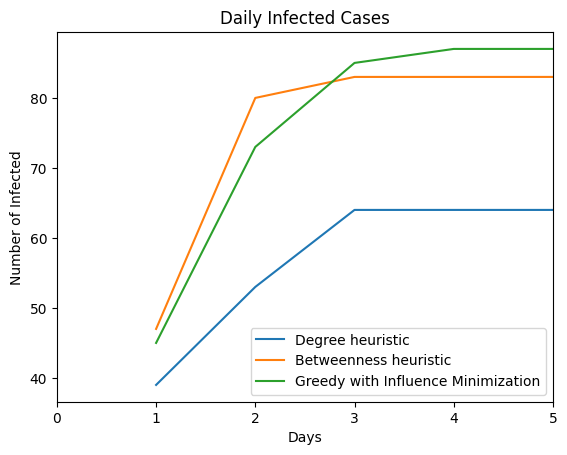

In [75]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[3]) + 1))

# Plotting the three list
plt.plot(days, Degree[3], label='Degree heuristic')
plt.plot(days, Betweenness[3], label='Betweenness heuristic')
plt.plot(days, Greedy[3], label='Greedy with Influence Minimization')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Daily Infected Cases')
# Setting x-axis limit to show only 0 to 5 days
plt.xlim(0, 5)
# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [22]:
def threshold_model(network, node_seed, threshold, n_day, mc=100, Monte_Carlo=False):
    spread, sum_spread, infected_per_day, infected_per_iteration = [], [], [], []
    for i in range(mc):
        if Monte_Carlo == True:
            np.random.seed(i)

        nNode = network.vcount()
        node_status = np.zeros(nNode, dtype=int) # start from a healthy population
        adj_matrix = np.array(network.get_adjacency().data)
        each_neighbors = {node: np.where(adj_matrix[node, :] > 0)[0] for node in range(nNode)} # get the neighbor list of each node
        infected_a_day,infected_List = [] , []
        

        for seed in node_seed:
            node_status[seed] = 1 # adopt (value=1), don't adopt (value=0)
        sum_of_ifected = 0
        for day in range(1,29):  #n_day + 1):
            n_infected = 0

            for node in range(nNode):
                if node_status[node] == 0:
                    neighbours = each_neighbors[node]
                    n_neighbors = len(neighbours)
                    n_adopters = np.sum(node_status[neighbours] == 1)

                    #if n_adopters/n_neighbors > threshold[node]:
                    # print(node, len(threshold))
                    if n_adopters > threshold[node]:
                        print(n_adopters, threshold[node])
                        node_status[node] = 1
                        n_infected += 1
            #print ("Day", day, ":", n_infected, "nodes are infected")
            
            infected_at_all = np.sum(node_status == 1)
            sum_of_ifected += np.sum(node_status == 1)
            infected_a_day.append(n_infected)
            infected_List.append(infected_at_all)

        spread_per_simulation = np.sum(node_status == 1)
        spread.append(spread_per_simulation)
        sum_spread.append(sum_of_ifected)
        infected_per_day.append(infected_a_day)
        infected_per_iteration.append(infected_List)
    return np.mean(spread), np.mean(sum_spread), compute_mean_by_index(infected_per_day), compute_mean_by_index(infected_per_iteration)

threshold_model(g, [53, 19, 109, 63, 95, 27, 36], Threshold_list, 28, mc = 100, Monte_Carlo = True)[3]

0 122
1 122
2 122
3 122
4 122
5 122
2 0
6 122
7 122
1 0
8 122
9 122
10 122
11 122
12 122
13 122
14 122
15 122
16 122
17 122
18 122
20 122
21 122
22 122
23 122
24 122
25 122
26 122
2 0
28 122
29 122
30 122
3 1
31 122
32 122
2 1
33 122
1 0
34 122
2 1
35 122
37 122
2 0
38 122
39 122
40 122
41 122
42 122
43 122
44 122
45 122
46 122
47 122
48 122
49 122
4 1
50 122
51 122
5 2
52 122
54 122
3 0
55 122
56 122
57 122
2 0
58 122
59 122
60 122
4 0
61 122
4 1
62 122
64 122
1 0
65 122
4 1
66 122
67 122
6 2
68 122
2 0
69 122
2 0
70 122
1 0
71 122
72 122
73 122
1 0
74 122
75 122
76 122
77 122
78 122
79 122
5 0
80 122
81 122
3 0
82 122
83 122
84 122
85 122
86 122
4 3
87 122
88 122
89 122
90 122
91 122
92 122
4 0
93 122
94 122
96 122
1 0
97 122
2 0
98 122
99 122
100 122
101 122
102 122
103 122
104 122
105 122
106 122
8 0
107 122
108 122
7 4
110 122
111 122
6 0
112 122
113 122
114 122
115 122
116 122
117 122
118 122
119 122
120 122
121 122
2 0
0 122
6 4
1 122
2 122
1 0
3 122
8 2
4 122
6 122
8 122
9 122


[38.0,
 54.0,
 68.0,
 77.0,
 80.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0,
 83.0]

In [5]:
Threshold_list = [0] * 15 + [0.1] * 5 + [0.2] * 5 + [0.3] + [0.4] * 2 + [0.5] * 2 + [0.6, 0.7, 0.8] + [0.9] * 4 + [1] * 85
# shuffle the list
np.random.shuffle(Threshold_list)

Threshold_list

[0.9,
 1,
 1,
 1,
 0.4,
 1,
 0.2,
 0.1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.7,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0.3,
 0.1,
 0.8,
 1,
 0.9,
 1,
 1,
 0,
 1,
 0.2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0.2,
 0.9,
 1,
 1,
 1,
 1,
 0.2,
 0,
 1,
 1,
 1,
 1,
 0.1,
 1,
 1,
 1,
 0,
 0.4,
 1,
 1,
 0.1,
 1,
 0,
 0.6,
 0,
 1,
 1,
 0.9,
 1,
 0.2,
 1,
 0,
 1,
 1]

In [49]:
def calculate_adopted_nei(node, node_status, each_neighbors):
    adopted_count = sum(node_status[each_neighbors[node]] == 1)
    total_neighbors = len(each_neighbors[node])
    return adopted_count / total_neighbors if total_neighbors > 0 else 0

# Prepare input for the 'calculate_adopted_nei' function
adj_matrix = g.get_adjacency()
adj_matrix = np.array(adj_matrix.data)
each_neighbors = adj_matrix.nonzero()

each_neighbors = {node: each_neighbors[1][each_neighbors[0] == node].tolist() for node in range(g.vcount())}

n_node = g.vcount()
node_status = [0] * n_node 
neighbour_status = [0] * n_node
new_infected = []
day_total_infected = [0] * 28

seed_list = [106]
# Day 1
day = 1
sum_of_ifected = 0 
infected_per_day = []
for node in seed_list: 
    node_status[node] = 1

new_infected.append(seed_list)

day_total_infected[day - 1] = sum(node_status)
#print(node_status)
for day in range(2, 28):
    not_adopted = [node for node in range(n_node) if node_status[node] == 0]
    adopted = [node for node in range(n_node) if node_status[node] == 1]
    neighbour_status = {node : calculate_adopted_nei(node, node_status, each_neighbors) for node in range(n_node)}
    infected = []
    for node in adopted:
        for neighbour in g.neighbors(node):
            if neighbour_status[neighbour] >= Threshold_list[neighbour] and neighbour not in adopted and neighbour not in infected: 
                infected.append(neighbour)
                print(infected)
    
    new_infected.append(infected)
    for node in new_infected[day - 1]:
        node_status[node] = 1
    sum_of_ifected += len(adopted)
    day_total_infected[day - 1] = sum(node_status)
    
    infected_per_day.append(len(new_infected[day - 1]))

infected_per_day

TypeError: list indices must be integers or slices, not list

In [53]:
neighbour_status = [calculate_adopted_nei(node, node_status, each_neighbors) for node in not_adopted]
neighbour_status


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
def calculate_adopted_nei(node: int, node_status: list, each_neighbors: dict) -> float:
    """
    Calculate the percentage of adopted neighbors for a given node.

    Parameters:
    -----------
    node : int
        The index of the node for which to calculate the percentage of adopted neighbors.
    node_status : list
        A list representing the status (0 or 1) of each node in the network.
    each_neighbors : dict
        A dictionary where the keys are node indices and the values are lists of indices of neighbors of each node.

    Returns:
    --------
    float
        The percentage of adopted neighbors for the given node.
    """

    adopted_nei = [node_status[nei] == 1 for nei in each_neighbors[node]]
    return len(adopted_nei)

In [10]:
node_status

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0]